In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
# Wavefunction generation
from scf_runs import run_lda_he
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.87015742152925  E(CI) = -2.87015742152925  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.950953194776060  E(CI) = -0.950953194776060  S^2 = 0.0000000
CASCI state   3  E = 0.604815912795335  E(CI) = 0.604815912795335  S^2 = 0.0000000
dict_keys(['mol', '_scf', 'verbose', 'stdout', 'max_memory', 'ncas', 'nelecas', '_ncore', 'fcisolver', 'frozen', 'extrasym', 'e_tot', 'e_cas', 'ci', 'mo_coeff', 'mo_energy', 'mo_occ', 'converged'])
Available output from CASCI: <KeysViewHDF5

In [ ]:
import importlib, recipes, linemin, sample_many
modules = [recipes, linemin, sample_many]
for m in modules:
    importlib.reload(m)


for fname in ['sj.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")

recipes.OPTIMIZE(scf_checkfile, "sj.hdf5", 
                 max_iterations=6, 
                 nconfig=10000, 
                 verbose=True,
                 # jastrow_kws={"ion_cusp":False}
                )

# Jastrow optimization results
df = recipes.read_opt("sj.hdf5")

# with h5py.File("sj.hdf5") as f:
#     print("keys", list(f.keys()))
#     print("wave function parameters", list(f['wf'].keys()))
#     ee_j = f['energy'][...]   
#     x = f['x'][...]
#     yfit = f['yfit'][...]
#     # pgrad = f['pgradient'][...]   
#     print(f['wf/wf2acoeff'][()])
#     print(f['wf/wf2bcoeff'][()])



RUNNING VMC OPTIMIZATION
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.6415681838371184
Dot product between gradient and SR step:  0.8870908008761059
descent en -2.783118826185414 0.003694257181868424
energies from correlated sampling [-2.5220069  -2.72290905 -2.8363005  -2.88620515 -2.89084196]
----------vmc done
Gradient norm:  0.10845080609510521
Dot product between gradient and SR step:  0.9448458349983968
descent en -2.8814993597443377 0.0023415385783757963
energies from correlated sampling [-2.86001324 -2.86686093 -2.87231793 -2.87632054 -2.87880299]
----------vmc done
Gradient norm:  0.03272650352739256
Dot product between gradient and SR step:  0.9971283274632644
descent en -2.892253997064146 0.002255929962124835
energies from correlated sampling [-2.88163453 -2.88285718 -2.88400926 -2.88509115 -2.88610322]
---------

In [ ]:
df

In [17]:
import wftools, bosonrecipes, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools
modules = [bosonrecipes,wftools, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools]
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
abvmc_file = 'abvmc-j-he_single.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION")

nblocks = 100
nsteps_per_block = 10
tstep=0.3
nconfig=1000
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_file, 
                  max_iterations=6, 
                  verbose=True,  
                  # nblocks=nblocks, 
                  # nsteps_per_block=nsteps_per_block,
                  # tstep= tstep, 
                  nconfig=nconfig)
dfb2 = bosonrecipes.read_abopt("bosonsj.hdf5")

RUNNING ABVMC OPTIMIZATION
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
> /Users/ksu/Documents/GitHub/pyqmc/pyqmc/accumulators.py(100)__init__()
     98         self.complex_inds = np.concatenate(
     99             [np.ones(to_opt[k].sum(), dtype=bool) * c for k, c in self.complex.items()]
--> 100         )
    101         self.nparams = np.sum([v.sum() for v in self.to_opt.values()])
    102 



ipdb>  exit


In [ ]:
x = range(len(df['energy']))
plt.errorbar(x, df['energy'], yerr=df['var'], label='vmc')
plt.errorbar(x, dfb2['energy'], yerr=dfb2['var'], label='abvmc')
plt.legend()
x

In [25]:
# f = h5py.File("bosonsj.hdf5")
# print(f.keys())
# print(f['energy'][...],
# f['energy_error'][...])

<KeysViewHDF5 ['configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'params', 'pgradient', 'ratio', 'tau', 'wf', 'x', 'yfit']>
[-14.40472907] [0.08041097]


In [175]:
def get_variance(df, 
                 discard = 10):
    keys = df.keys()
    numblocks = df[keys[0]].shape[0]
    num_used_blocks = numblocks - discard
    print('\t\t\t{:10s} {:6s} {:3s}'.format('Mean', 'Var', 'Ratio'))
    for k in keys:
        eb = df[k][discard:]
        mean = np.mean(eb)
        var = np.sqrt(1/(num_used_blocks - 1 ) * np.sum(eb**2 - mean**2))
        print('{} \t {:.6f} \t {:.6f} {:.3f}'.format(k, mean, var, np.abs(var/mean)))

<KeysViewHDF5 ['acceptance', 'block', 'configs', 'energycorr', 'energyee', 'energyei', 'energygrad2', 'energyii', 'energyka', 'energykb', 'energyke', 'energytotal', 'energyvh', 'energyvxc', 'nconfig']>
			Mean       Var    Ratio
energytotal 	 -15.933906 	 0.698527 0.044
energyee 	 4.418750 	 0.191676 0.043
energyei 	 -32.944430 	 2.265501 0.069
energyke 	 -1.376701 	 0.688894 0.500
energyvxc 	 -3.291024 	 0.142922 0.043
<KeysViewHDF5 ['acceptance', 'block', 'configs', 'energycorr', 'energyee', 'energyei', 'energygrad2', 'energyii', 'energyka', 'energykb', 'energyke', 'energytotal', 'energyvh', 'energyvxc', 'nconfig']>


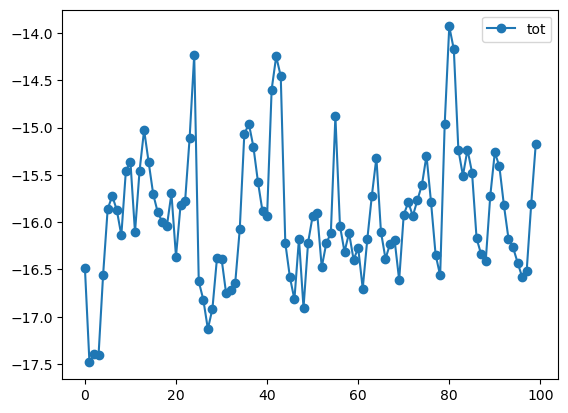

In [176]:
get_variance(bosonrecipes.read_abvmc("bosonvmc.hdf5"),
            discard=0)
df2 = bosonrecipes.read_abvmc("bosonvmc.hdf5")
df2
plt.plot(df2['energytotal'], '-o', label='tot')
# plt.plot(df2['energyei'], label='ei')
# plt.plot(df2['energyee'], label='ee')
# plt.plot(df2['energyke'], label='ke')
# plt.plot(df2['energyvxc'], label='vxc')
# plt.axhline(y=0, linestyle='dashed')
plt.legend()

In [177]:
df.keys()

Index(['energytotal', 'energyee', 'energyei', 'energyke', 'energyvxc'], dtype='object')

In [54]:
f = h5py.File("abvmc.hdf5") 
f.keys()

<KeysViewHDF5 ['acceptance', 'block', 'configs', 'energycorr', 'energyee', 'energyei', 'energygrad2', 'energyii', 'energyka', 'energykb', 'energyke', 'energytotal', 'energyvh', 'energyvxc', 'nconfig']>

In [40]:
with h5py.File("bosonsj.hdf5") as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    # pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])


keys ['configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'params', 'pgradient', 'ratio', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 0.06236737  0.0460754 ]
  [ 0.11266527  0.09275183]
  [ 0.09549062  0.0722368 ]
  [-0.14058644 -0.21081796]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.020783   -0.11218173 -0.00906218]
 [ 0.00300756 -0.0642666  -0.01938471]
 [-0.00554548 -0.08343726 -0.01267485]]


In [35]:
df2.keys()

Index(['energy', 'iteration', 'error', 'fname'], dtype='object')

Text(0.5, 0, 'Iteration')

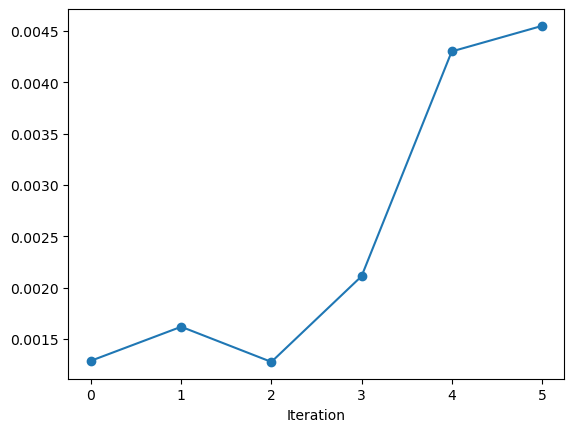

In [34]:
f = h5py.File("bosonsj.hdf5")
y=f['energy'][...]
y=f['ratio'][...]
plt.plot(y, marker='o', label="etot")
# y=f['params'][...]

import matplotlib.pyplot as plt

plt.xlabel('Iteration')
# plt.ylabel('Value of Jastrow parameters')

Text(0.5, 1.0, 'VMC optimization')

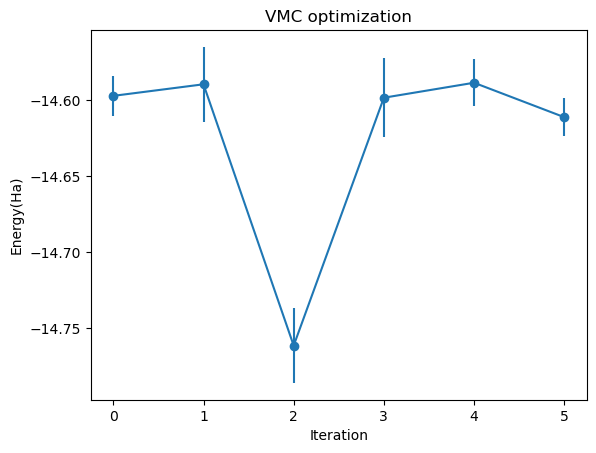

In [28]:
plt.errorbar(df2['iteration'], df2['energy'], yerr=df2['error'],marker='o', label="etot")
plt.ylabel('Energy(Ha)')
plt.xlabel('Iteration')
plt.title('VMC optimization')

In [41]:
import importlib, recipes, bosonsamplemany, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools 
modules = [recipes,bosonsamplemany, bosonrecipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
    
for fname in ['bosonsjnoi.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION NO ION CUSP")
wf, df = bosonrecipes.ABOPTIMIZE(scf_checkfile, "bosonsjnoi.hdf5", max_iterations=24, nconfig=1000, verbose=True,
                                jastrow_kws={"ion_cusp":False}
                                )

# Jastrow optimization results
dfnoi = pyq.read_opt("bosonsjnoi.hdf5")
dfnoi



RUNNING ABVMC OPTIMIZATION NO ION CUSP
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
starting warmup
finished warmup
-

/Users/ksu/Documents/GitHub/pyqmc2/pyqmc/pyqmc/boson_stochastic_reconfiguration.py:28: RuntimeWarning: divide by zero encountered in divide
  r = 1.0 / grad2
/Users/ksu/Documents/GitHub/pyqmc2/pyqmc/pyqmc/boson_stochastic_reconfiguration.py:35: RuntimeWarning: invalid value encountered in add
  f = a * r + b * r**2 + c * r**3


---------vmc done
descent en -1.0900746693842112 0.0010957341254640067  estimated sigma  0.3465015546438965
descent |grad| 0.13175222434287537
----------vmc done
descent en -1.0958830105314887 0.0010997377012980762  estimated sigma  0.34776759648598327
descent |grad| 0.0867516081791171
----------vmc done
descent en -1.10233751474828 0.0008834859005304685  estimated sigma  0.27938277263212435
descent |grad| 0.060197542903911744
----------vmc done
descent en -1.1068979475925533 0.0012637157431618644  estimated sigma  0.39962200634038453
descent |grad| 0.04408257675354828
----------vmc done
descent en -1.1105110414644976 0.0007386165120779486  estimated sigma  0.23357104955755847
descent |grad| 0.034604880806578586
----------vmc done
descent en -1.1125779223131962 0.0005965956982615144  estimated sigma  0.18866012487649422
descent |grad| 0.02907797065454639
----------vmc done
descent en -1.1164594587265113 0.0007965902612962418  estimated sigma  0.2519039587604798
descent |grad| 0.0250985

,energy,iteration,error,fname
0,-1.090075,0,0.001096,bosonsjnoi.hdf5
1,-1.095883,1,0.001100,bosonsjnoi.hdf5
2,-1.102338,2,0.000883,bosonsjnoi.hdf5
3,-1.106898,3,0.001264,bosonsjnoi.hdf5
4,-1.110511,4,0.000739,bosonsjnoi.hdf5
5,-1.112578,5,0.000597,bosonsjnoi.hdf5
6,-1.116459,6,0.000797,bosonsjnoi.hdf5
7,-1.118358,7,0.000477,bosonsjnoi.hdf5
8,-1.117915,8,0.000596,bosonsjnoi.hdf5
9,-1.120150,9,0.000633,bosonsjnoi.hdf5


keys ['configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'params', 'pgradient', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 0.24253188  0.24223779]
  [ 0.13472868  0.13286617]
  [-0.03283102 -0.03590994]
  [-0.02293318 -0.02583854]]

 [[ 0.24277621  0.24233325]
  [ 0.13389851  0.13339007]
  [-0.03384511 -0.03440812]
  [-0.02432184 -0.02415704]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.46887438  0.        ]
 [ 0.         -0.37807785  0.        ]
 [ 0.         -0.08888051  0.        ]]


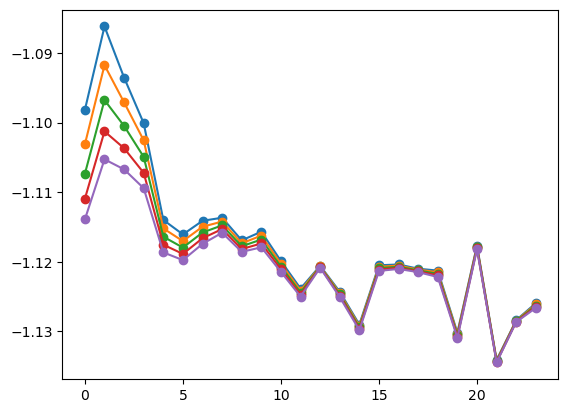

In [54]:
with h5py.File("bosonsjnoi.hdf5") as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


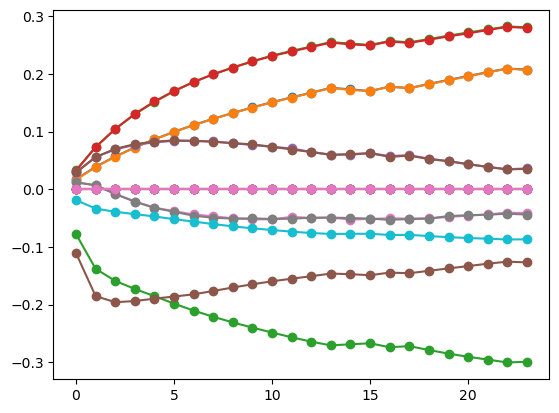

In [24]:
f = h5py.File("bosonsjnoi.hdf5")
aa=f['params'][...]
import matplotlib.pyplot as plt
plt.plot(aa, marker='o', label="etot")
plt.xlabel('Iteration')
plt.ylabel('Value of Jastrow parameters')

In [ ]:
import importlib, bosonsamplemany, recipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin2, bosonmc, bosonmultiplywf, bosonwftools 
modules = [recipes, bosonsamplemany, bosonrecipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin2, bosonmc, bosonmultiplywf, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
    
for fname in ['bosonsj2.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION")
wf, df = bosonrecipes.ABOPTIMIZE2(scf_checkfile, "bosonsj2.hdf5", max_iterations=18, nconfig=1000, verbose=True)

# Jastrow optimization results
df3 = pyq.read_opt("bosonsj2.hdf5")
df3



RUNNING ABVMC OPTIMIZATION
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.5370995534623512
Dot product between gradient and SR step:  0.8853749710653968
> /Users/ksu/Documents/GitHub/pyqmc2/pyqmc/pyqmc/bosonsamplemany.py(154)sample_overlap_block()
    152             import pdb
    153             pdb.set_trace()
--> 154             grads = [np.real(g.T) for g in grads]
    155             new_grad = mc.limdrift(np.mean(grads, axis=0))
    156             forward = np.sum(gauss**2, axis=1)



ipdb>  vals


[array([1.05929566e-01, 5.58596666e-01, 6.94217831e-02, 1.09290187e-02,
       3.13706009e-01, 2.56096718e-01, 2.03687433e-01, 1.28509371e-01,
       6.82321908e-02, 6.22788188e-03, 1.28709990e-01, 4.12332069e-02,
       1.41417605e-01, 2.44477729e-03, 1.51778509e-01, 1.24756806e-01,
       2.16321793e-02, 4.10407239e-02, 1.50282805e-02, 8.45807014e-01,
       1.72904046e-01, 1.28011419e-02, 2.38327187e-02, 3.85848577e-01,
       1.23036022e-01, 6.73523299e-02, 1.08685047e-01, 7.58204345e-02,
       2.05167496e-01, 5.18991570e-01, 2.47409037e-02, 5.17697912e-02,
       1.15265745e-01, 1.35741329e-02, 2.85978969e-01, 5.12915029e-01,
       5.85883808e-02, 2.35348360e-02, 9.47577080e-02, 7.09176654e-03,
       2.35110145e-02, 2.80157097e-02, 6.73153030e-02, 1.84485220e-01,
       4.16803346e-01, 3.43463536e-01, 2.90843859e-01, 3.25502714e-01,
       4.86029232e-03, 8.97395351e-02, 3.26036957e-02, 1.54272135e-01,
       1.58037776e-02, 4.73955813e-02, 6.84001479e-02, 4.99265492e-01,
     

ipdb>  vals[0].shape


(1000,)


In [30]:
df

[{'energy': -0.9052183763636256,
  'energy_error': 0.00242254076639009,
  'x': array([-0.01135554,  0.        , -0.00521015,  0.        ,  0.11537073,
          0.        ,  0.19787908,  0.        , -0.01837403,  0.        ,
         -0.00912813,  0.        ,  0.11502076,  0.        ,  0.19776363,
          0.        ,  0.02221187,  0.        ,  0.        ,  0.03657456,
          0.        ,  0.        ,  0.01813467,  0.        ,  0.        ]),
  'pgradient': array([0.02867168, 0.        , 0.03819655, 0.        , 0.05405966,
         0.        , 0.05529845, 0.        , 0.0271965 , 0.        ,
         0.02783075, 0.        , 0.03413183, 0.        , 0.03191735,
         0.        , 0.03101672, 0.        , 0.        , 0.02198652,
         0.        , 0.        , 0.00824031, 0.        , 0.        ]),
  'iteration': 0,
  'nconfig': 1000,
  'tau': [-0.06666666666666667,
   0.0,
   0.06666666666666667,
   0.13333333333333336,
   0.2],
  'yfit': [-0.9056155272802386,
   -0.9039979361172412,
 

In [47]:
tstep = 0.1
nconfig = 100
nblocks = 300
nsteps_per_block = 4
discard = 10

In [48]:
#PYQMC VMC with jastrow
#
#
import importlib, recipes, abdmc, wftools, bosonwf, determinant_tools, mc, dmc, slater, orbitals, accumulators, energy, jastrowspin, multiplywf
modules = [recipes, abdmc, wftools, bosonwf, determinant_tools, mc, dmc, slater, orbitals, accumulators, energy, jastrowspin, multiplywf] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)
# Jastrow optimization
for fname in ['vmc-j-001.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
from recipes import ABDMC, DMC, ABVMC, VMC
VMC("scf.hdf5", "vmc-j-001.hdf5",
    load_parameters="sj.hdf5", verbose=True,
    nblocks=nblocks, 
    nsteps_per_block=nsteps_per_block,
    tstep= tstep,
    nconfig=nconfig)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------vmc done


Mean  etot_j ,  -0.8897169600414305 +/- 0.00012525857260279387
Mean  ee_j ,  0.35557155795149653 +/- 0.00019581281025000643
Mean  ei_j ,  -2.8862855343932647 +/- 0.017859623421927814
Mean  ke_j ,  1.1409970164003378 +/- 0.016933629805217


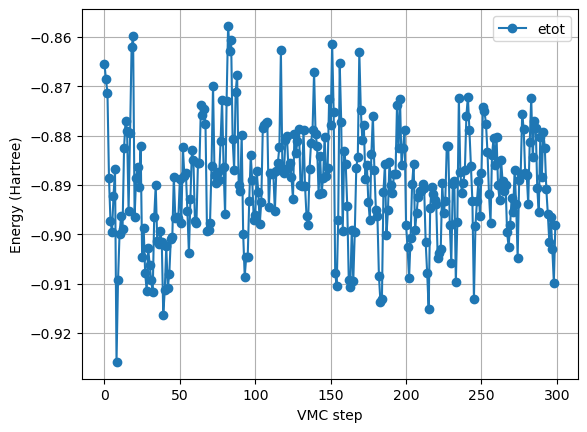

In [49]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

import matplotlib.pyplot as plt
with h5py.File("vmc-j-001.hdf5") as f:
    ee_j = f['energyee'][...]   
    ei_j = f['energyei'][...]
    # ii = f['energyii'][...]    
    ke_j = f['energyke'][...]
    etot_j = f['energytotal'][...]
plt.plot(etot_j, marker='o', label="etot")
# plt.plot(ee_j, marker='o', label="ee")
# plt.plot(ei_j, marker='o', label="ei")
# plt.plot(ke_j, marker='o', label="ke")

# plt.plot(vxc-vxc[0], marker='o', label="vxc")
plt.legend()
plt.xlabel("VMC step")
plt.ylabel("Energy (Hartree)")
# plt.xlim((200,500))
# plt.ylim((-10, 5))
plt.grid()
# plt.figure()
discard = 10
for e in [etot_j, ee_j, ei_j, ke_j]:
    e_m = np.mean(e[discard:])
    e_d = np.var(e[discard:])
    print("Mean ", namestr(e, globals())[0], ", ", e_m, "+/-", e_d)

# e_m = np.mean(etot[discard:])
# e_d = np.var(etot[discard:])
# # e_m2 = np.mean(etot2[discard:])
# # e_d2 = np.var(etot2[discard:])
# print("Mean VMC Energy, ", e_m, "+/-", e_d)
# print("LDA Energy, ", mf.energy_tot())
# plt.plot(ed, marker='o', label="ke")

# print('ee', np.mean(ee[discard:]))
# print('ei', np.mean(ei[discard:]))
# print('ke', np.mean(ke[discard:]))


In [50]:
#ABVMC with jastrows
#
#
import importlib, multiplywf, recipes, abdmc, wftools, bosonwf, determinant_tools, mc, dmc, slater, orbitals, accumulators, energy, jastrowspin, multiplywf
modules = [recipes, abdmc, wftools, bosonwf, determinant_tools, mc, dmc, slater, orbitals, accumulators, energy, jastrowspin, multiplywf] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)
# Jastrow optimization
for fname in ['abvmc-j-001.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
from recipes import ABDMC, DMC, ABVMC, VMC

ABVMC("scf.hdf5", "abvmc-j-001.hdf5", 
      load_parameters="sj.hdf5", verbose=True,  
      nblocks=nblocks, 
      nsteps_per_block=nsteps_per_block,
      tstep= tstep, 
      nconfig=nconfig)

Number of determinants in the bosonic wavefunction= 1
Using spherical guess
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------vmc done


Mean  etot_j_abvmc ,  -0.8914363874703352 +/- 0.001298214686930013
LDA Energy,  -2.8267065541861145


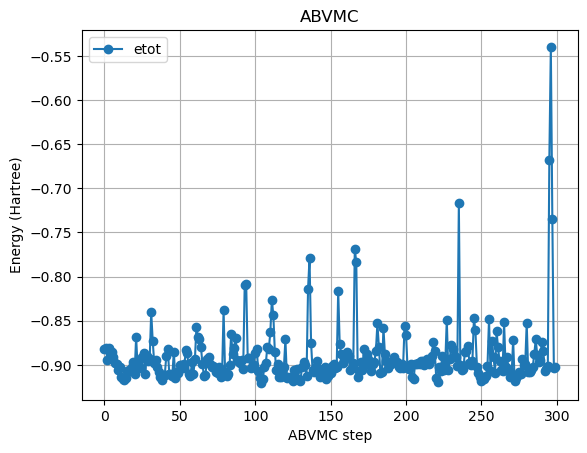

In [51]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
import matplotlib.pyplot as plt
with h5py.File("abvmc-j-001.hdf5") as f:
    ee_abvmc = f['energyee'][...]   
    ei_abvmc = f['energyei'][...]
    vh_abvmc = f['energyvh'][...]   
    vxc_abvmc = f['energyvxc'][...]       
    # eid = f['energyeid'][...]    
    ii_abvmc = f['energyii'][...]    
    ke_abvmc = f['energyke'][...]
    ka_abvmc = f['energyka'][...]
    kb_abvmc = f['energykb'][...]   
    ecorr_abvmc = f['energycorr'][...]    
    etot_j_abvmc = f['energytotal'][...] 
vhxc_abvmc = vh_abvmc + vxc_abvmc

plt.plot(etot_j_abvmc, marker='o', label="etot")

plt.legend()
plt.xlabel("ABVMC step")
plt.ylabel("Energy (Hartree)")
plt.grid()
plt.title('ABVMC')
for e in [etot_j_abvmc]:
    e_m = np.mean(e[discard:])
    e_d = np.var(e[discard:])
    nn = namestr(e, globals())
    name = nn[0] if nn[0] != 'e' else nn[1]
    print("Mean ", name, ", ", e_m, "+/-", e_d)
print("LDA Energy, ", mf_lda.energy_tot())



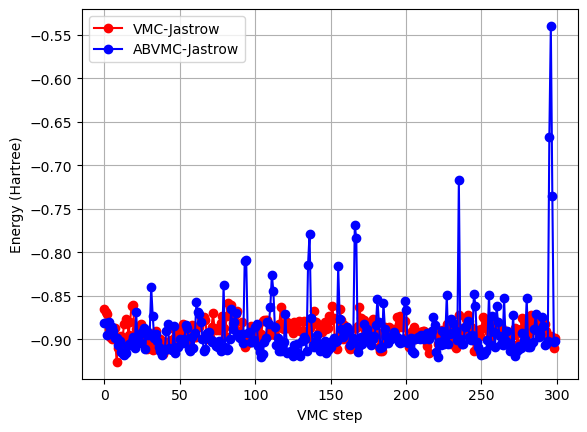

In [52]:
plt.plot(etot_j, marker='o', color = 'r', label="VMC-Jastrow")
plt.plot(etot_j_abvmc, marker='o', color='b', label="ABVMC-Jastrow")

plt.legend()
plt.xlabel("VMC step")
plt.ylabel("Energy (Hartree)")
# plt.ylim((-1.4, -1))
# discard =  1000
# plt.axvline(discard, linestyle='dashed')
# plt.axhline(np.mean(etot_j[discard:]), color='r')
# plt.axhline(np.mean(etot_j_abvmc[discard:]), color='b')
plt.grid()
